<a href="https://colab.research.google.com/github/1901010019/1901010019.github.io/blob/master/overfitted_model_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons
data_x, data_y = make_moons(n_samples=1000)
# data_x, data_y

In [3]:
data_x.max(), data_x.min() # data is fairly normalized, so we will not normalize our data in this case

(2.0, -1.0)

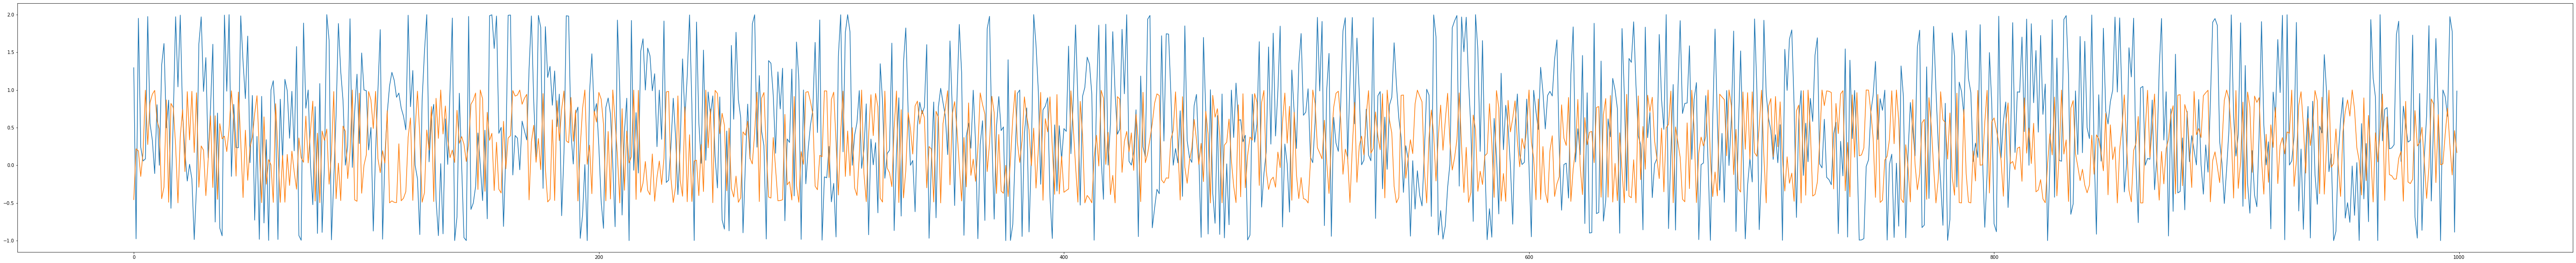

In [4]:
plt.figure(figsize=(100,10))
plt.plot(data_x)

In [5]:
data = pd.DataFrame({'x0': data_x[:,0], 'x1': data_x[:,1], 'y':data_y})
data.head()

,x0,x1,y
0,1.294612,-0.455617,1
1,-0.975821,0.218573,0
2,1.950862,0.190384,1
3,0.238471,-0.148131,1
4,0.057236,0.166539,1


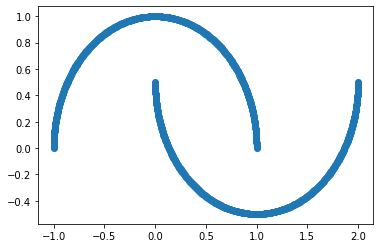

In [6]:
plt.scatter(data['x0'], data['x1']) # ohh yess, we got the data of moon shape

In [7]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

# making of a model

In [8]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, activation='relu'),
                             tf.keras.layers.Dense(10, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test), callbacks=[lr_scheduler])

Epoch 1/25
25/25 [==============================] - 3s 11ms/step - loss: 0.7775 - accuracy: 0.4925 - val_loss: 0.7314 - val_accuracy: 0.5300
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.7051 - accuracy: 0.5088 - val_loss: 0.6642 - val_accuracy: 0.5600
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6419 - accuracy: 0.5462 - val_loss: 0.6019 - val_accuracy: 0.5900
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5844 - accuracy: 0.6000 - val_loss: 0.5438 - val_accuracy: 0.6750
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5311 - accuracy: 0.7663 - val_loss: 0.4906 - val_accuracy: 0.8450
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.4828 - accuracy: 0.8325 - val_loss: 0.4463 - val_accuracy: 0.8600
Epoch 7/25
25/25 [==============================] - 0s 4ms/step - loss: 0.4405 - accuracy: 0.8687 - val_loss: 0.4089 - val_accuracy: 0.8750
Epoch 8/25
25/25 [=

In [9]:
model.evaluate(x_test,y_test) # evaluating our test data on our trained model.

7/7 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000


[0.0053994255140423775, 1.0]

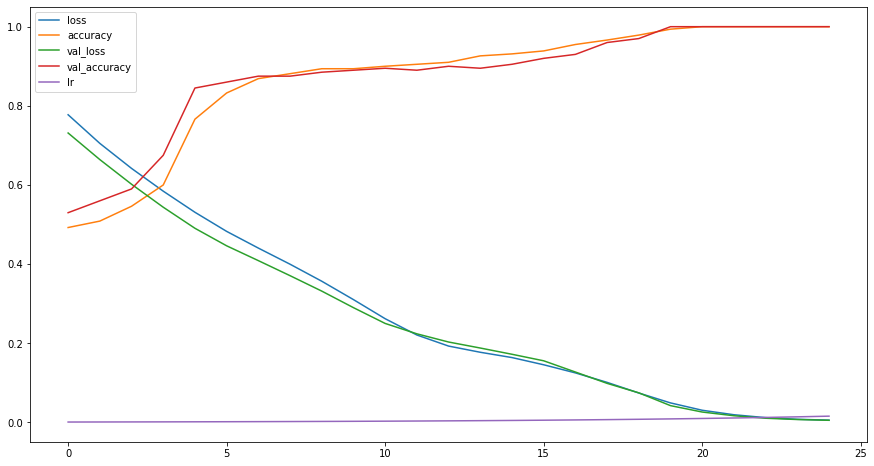

In [10]:
pd.DataFrame(history.history).plot(figsize=(15,8))

In [11]:
y_prob = model.predict(x_test)
y_prob

array([[9.9920350e-01],
       [2.2542219e-05],
       [3.0514361e-02],
       [3.3237768e-05],
       [9.9922955e-01],
       [3.1162421e-05],
       [2.6532814e-05],
       [7.0223995e-02],
       [9.9629635e-01],
       [3.3240527e-02],
       [1.0146242e-02],
       [9.6015829e-01],
       [9.9600750e-01],
       [9.9986506e-01],
       [1.0027976e-03],
       [2.2575854e-04],
       [5.8801783e-05],
       [1.1984446e-03],
       [9.9782640e-01],
       [1.8541790e-03],
       [2.2855009e-05],
       [9.9719185e-01],
       [9.9845886e-01],
       [9.4306571e-03],
       [1.0414638e-04],
       [9.9269825e-01],
       [2.8147709e-03],
       [9.9890029e-01],
       [9.9466777e-01],
       [2.9764738e-05],
       [1.4117293e-03],
       [8.6581349e-05],
       [1.4140999e-03],
       [1.1795531e-03],
       [6.8416535e-05],
       [1.1499850e-03],
       [1.1402451e-03],
       [2.2535041e-05],
       [1.4147270e-03],
       [1.1235355e-01],
       [3.1498726e-03],
       [9.974505

In [12]:
y_pred = tf.round(y_prob)
y_pred = tf.squeeze(y_pred) # we can reduce dimensionality by squeeze.

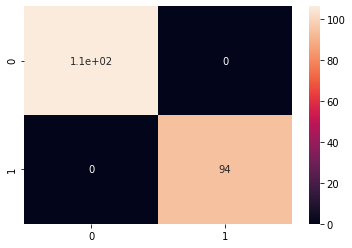

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ct = confusion_matrix(y_test, y_pred)
sns.heatmap(ct, annot=True)

In [14]:
history.history # we can view the history of our training through this line of code

{'accuracy': [0.4925000071525574,
  0.5087500214576721,
  0.5462499856948853,
  0.6000000238418579,
  0.7662500143051147,
  0.8324999809265137,
  0.8687499761581421,
  0.8812500238418579,
  0.893750011920929,
  0.893750011920929,
  0.8999999761581421,
  0.9049999713897705,
  0.9100000262260437,
  0.9262499809265137,
  0.9312499761581421,
  0.9387500286102295,
  0.9549999833106995,
  0.9662500023841858,
  0.9787499904632568,
  0.9937499761581421,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.7774631977081299,
  0.7051398754119873,
  0.6419247388839722,
  0.5843914747238159,
  0.5310574173927307,
  0.48275017738342285,
  0.44054022431373596,
  0.39979252219200134,
  0.356808066368103,
  0.3103380501270294,
  0.26208236813545227,
  0.22091516852378845,
  0.19293855130672455,
  0.17729002237319946,
  0.16389527916908264,
  0.14567789435386658,
  0.12516801059246063,
  0.10120799392461777,
  0.074332095682621,
  0.04932926967740059,
  0.030756140127778053,
  0.019419824704527855,
  0.0121

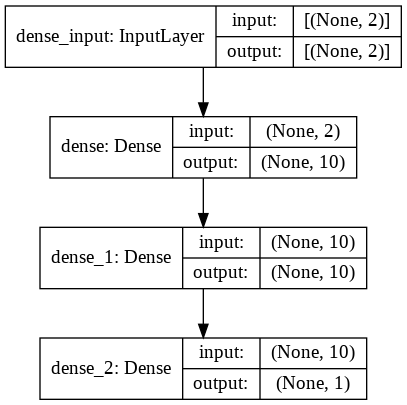

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True) # this our model architecture